<a href="https://colab.research.google.com/github/imsheremet/EEC206-Labs/blob/main/lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1

Clear the variable in case there are stale variables that might break things. Then import the libraries that will be needed.

In [1]:
# clear variables
from IPython import get_ipython
get_ipython().magic('reset -sf')

# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import timeit

## Read In the Image

Read in the image, convert it to grayscale, and display the grayscale image

(-0.5, 255.5, 255.5, -0.5)

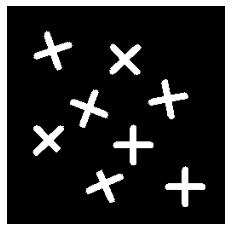

In [4]:
# # test array
# imgBw = np.array([
#     [  0,255,  0,  0],
#     [255,  0,  0,  0],
#     [  0,  0,  0,255],
#     [  0,  0,  0,255]
# ])

# read in image
img = mpimg.imread('proj1-bw.gif')

# convert image to grayscale
imgGray = np.rint(np.dot(img[:,:,:3],[0.2989,0.5870,0.1140]))

# show image
plt.imshow(imgGray, cmap='gray')

plt.axis('off')

## Connected-component Grouping with 'One Component at a Time' Algorithm

Define a function that will take in a grayscale image, convert to black and white using thresholding, determine the connected-component objects in the image, and output an image with the objects at different gray levels

In [5]:
def ccGroup(imgIn):

    # convert grayscale image to a black and white (ie background and foregrond) image 
    # by setting all values under threshold to 0, and overthreshold to 1 
    imgBw = np.zeros(imgIn.shape)
    threshold = 128
    imgBw[imgIn >= threshold] = 1
    
    # add black lines around image to make it easier to check pixels on the edges 
    # of the image
    imgBwExpanded = np.zeros((imgBw.shape[0]+2,imgBw.shape[1]+2))
    imgBwExpanded[1:-1,1:-1] = imgBw

    # initialize an array that will store the label for each pixel; 0 means that the
    # pixel is not labeled, 1 means that its label 1, 2 means that its label 2, etc
    pixelLabeles = np.zeros(imgBw.shape)

    # iniliazlize queue and current label value
    pixelQueue = []
    currentLabel = 1

    # iterate over the image pixels and pixel labels
    it = np.nditer([imgBw,pixelLabeles], flags=['multi_index'], op_flags=['readwrite'])

    for pixel,pixelLabel in it:
        # check if pixel is white and not labeled
        if pixel == 1 and pixelLabel == 0:
            # add pixel index to queue
            pixelQueue.append(it.multi_index)

            # add label for the pixel
            pixelLabel[...] = currentLabel

            # while queue is not empty, pop an element from the queue and check its neighbors
            while pixelQueue:
                currentPixelIndex = pixelQueue.pop()
                #print('pixel index from queue =',currentPixelIndex)

                # convert the pixel index to neighbor indexes
                neighbor1Idx = (currentPixelIndex[0]-1,currentPixelIndex[1]-1)
                neighbor2Idx = (currentPixelIndex[0]-1,currentPixelIndex[1])
                neighbor3Idx = (currentPixelIndex[0]-1,currentPixelIndex[1]+1)
                neighbor4Idx = (currentPixelIndex[0],currentPixelIndex[1]-1)
                neighbor5Idx = (currentPixelIndex[0],currentPixelIndex[1]+1)
                neighbor6Idx = (currentPixelIndex[0]+1,currentPixelIndex[1]-1)
                neighbor7Idx = (currentPixelIndex[0]+1,currentPixelIndex[1])
                neighbor8Idx = (currentPixelIndex[0]+1,currentPixelIndex[1]+1)

                # if a neighbor is white and not labeled, label pixel and add pixel to queue
                if imgBwExpanded[neighbor1Idx[0]+1,neighbor1Idx[1]+1]== 1:
                    if pixelLabeles[neighbor1Idx] == 0:
                        #print(' connected neighbor at',neighbor1Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor1Idx)

                        # label pixel
                        pixelLabeles[neighbor1Idx] = currentLabel
                        
                if imgBwExpanded[neighbor2Idx[0]+1,neighbor2Idx[1]+1]== 1:
                    if pixelLabeles[neighbor2Idx] == 0:
                        #print(' connected neighbor at',neighbor2Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor2Idx)

                        # label pixel
                        pixelLabeles[neighbor2Idx] = currentLabel

                if imgBwExpanded[neighbor3Idx[0]+1,neighbor3Idx[1]+1]== 1:
                    if pixelLabeles[neighbor3Idx] == 0:
                        #print(' connected neighbor at',neighbor3Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor3Idx)

                        # label pixel
                        pixelLabeles[neighbor3Idx] = currentLabel

                if imgBwExpanded[neighbor4Idx[0]+1,neighbor4Idx[1]+1]== 1:
                    if pixelLabeles[neighbor4Idx] == 0:
                        #print(' connected neighbor at',neighbor4Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor4Idx)

                        # label pixel
                        pixelLabeles[neighbor4Idx] = currentLabel

                if imgBwExpanded[neighbor5Idx[0]+1,neighbor5Idx[1]+1]== 1:
                    if pixelLabeles[neighbor5Idx] == 0:
                        #print(' connected neighbor at',neighbor5Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor5Idx)

                        # label pixel
                        pixelLabeles[neighbor5Idx] = currentLabel

                if imgBwExpanded[neighbor6Idx[0]+1,neighbor6Idx[1]+1]== 1:
                    if pixelLabeles[neighbor6Idx] == 0:
                        #print(' connected neighbor at',neighbor6Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor6Idx)

                        # label pixel
                        pixelLabeles[neighbor6Idx] = currentLabel

                if imgBwExpanded[neighbor7Idx[0]+1,neighbor7Idx[1]+1]== 1:
                    if pixelLabeles[neighbor7Idx] == 0:
                        #print(' connected neighbor at',neighbor7Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor7Idx)

                        # label pixel
                        pixelLabeles[neighbor7Idx] = currentLabel

                if imgBwExpanded[neighbor8Idx[0]+1,neighbor8Idx[1]+1]== 1:
                    if pixelLabeles[neighbor8Idx] == 0:
                        #print(' connected neighbor at',neighbor8Idx)

                        # add pixel to queue
                        pixelQueue.append(neighbor8Idx)

                        # label pixel
                        pixelLabeles[neighbor8Idx] = currentLabel

            # increment current label
            currentLabel = currentLabel + 1

    # determine number of objects in the image
    numObjects = currentLabel-1

    # determine number of intensity levels to space apart the intensity levels of each object
    objectIntensityDiff = np.rint(256/numObjects)

    # replace each object label value with intensity level value
    for obj in range(1,numObjects+1):
        #print('object #', obj)
        pixelLabeles[pixelLabeles == obj] = obj*objectIntensityDiff

    return pixelLabeles,numObjects


## Process the grayscale image

Run the grayscale image through the connected-component grouping function and display the results

Found 8 clusters in the image


(-0.5, 255.5, 255.5, -0.5)

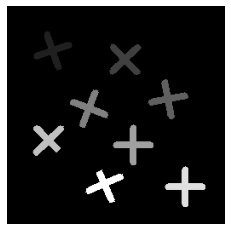

In [6]:
# run connected-component grouping function on image
outImg,n = ccGroup(imgGray)

# display how many clusters were found in the image
print('Found %i clusters in the image' % n)

# plot output image
plt.imshow(outImg, cmap='gray')

plt.axis('off')

## Time How Long the Grouping Takes

In [7]:
%%timeit
outImg,n = ccGroup(imgGray)

10 loops, best of 5: 150 ms per loop
